# Independent Project - Week 6 (Sheila Nyongesa)

## 1. Defining the Question

### a) Specifying the Question

> I have been tasked with studying the factors that affect housing prices using information on real estate properties that was collected over the past few months and create a model that would allow Hass Consulting to accurately predict the prices of houses.

### b) Defining the Metric for Success

> The project will be a success if the most effective model will be developed to predict the prices of houses.

### c) Understanding the context 

> Hass Consulting wishes to implement a model that can effectively predict the prices of houses.

### d) Recording the Experimental Design

> For the project to be a success, the following steps will be followed:

> > 1) Reading  the data.

> > 2) Checking the data

> > 3) Tidying the Dataset

> > 4) Exploratory Data Analysis

> > 5) Check for multicollinearity.

> > 6) Implementing the Solution using Multiple Linear Regression, Quantile Regression, Ridge Regression, Lasso Regression and Elastic Net Regression regression methods.

> > 7) Challenging the solution

### e) Data Relevance

> The data provided is relevant to the development of a house pricing model as it includes past information on performance of various teams as well as the current ranking of the teams on Fifa.

## 2. Reading the Data

In [31]:
# Importing the necessary libraries for analysis

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import ElasticNet
import statsmodels.formula.api as smf

In [32]:
# Load housing dataset
house_data = pd.read_csv('http://bit.ly/KCHouseDataset')

## 3. Checking the Data

In [33]:
# Determining the no. of records in our dataset
print(house_data.shape)

(21613, 21)


In [34]:
# Previewing the top of our dataset
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [35]:
# Previewing the bottom of our dataset
house_data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [36]:
# Checking whether each column has an appropriate datatype (results)
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [37]:
# Convert the 'bedrooms','bathrooms' and 'floors' values to int, this is because the value of a room/floor cannot have a fraction, it is a full number.
house_data[['bedrooms','bathrooms', 'floors']] = house_data[['bedrooms','bathrooms', 'floors']].astype(int)
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int32  
 4   bathrooms      21613 non-null  int32  
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  int32  
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## 3. Tidying the Dataset

### 3.1 Identification, assessment and removal of outliers

The housing prices dataset from HFC had a total of 3,988 significant records having ouliers identified on the following variables: *'price','bedrooms', 'bathrooms','sqft_living', 'sqft_lot','condition','sqft_above', 'sqft_basement', 'sqft_living15','sqft_lot15.*

These records with outliers cover approximately 18% of the dataset and may significantly have an effect on the overall performance of the prediction models. **These outliers will be dropped** and 82% of the records will be retained for prediction purposes.
To identify and drop the outliers, the following process was followed:

> 3.1.1 Identify the total number of outliers based on all the fields using Interquartile ranges as follows:

In [38]:
# Identify the number of outliers using interquartile ranges
# Obtain the interquartile range
Q1 = house_data.quantile(0.25)
Q3 = house_data.quantile(0.75)
IQR = Q3 - Q1

# Outline the number of identified outliers on the price
house_data_identified_outliers = house_data[((house_data < (Q1 - 1.5 * IQR[['price','bedrooms', 'bathrooms','sqft_living', 'sqft_lot','condition','sqft_above', 'sqft_basement', 'sqft_living15','sqft_lot15']])) |(house_data > (Q3 + 1.5 * IQR[['bedrooms', 'bathrooms','sqft_living', 'sqft_lot','condition','sqft_above', 'sqft_basement', 'sqft_living15','sqft_lot15']]))).any(axis=1)]
print('The total number of outliers identified is: ' + str(house_data_identified_outliers['id'].count()))

The total number of outliers identified is: 3988


> 3.1.2 Plot boxplots for the data before removing outliers

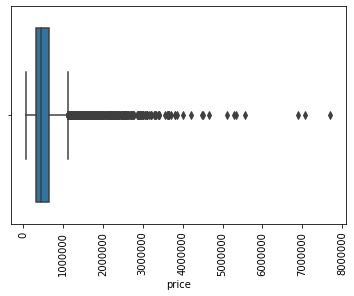

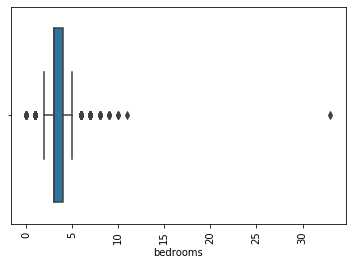

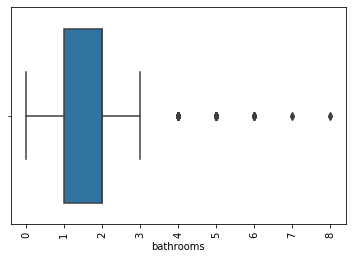

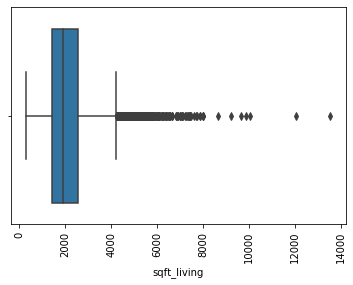

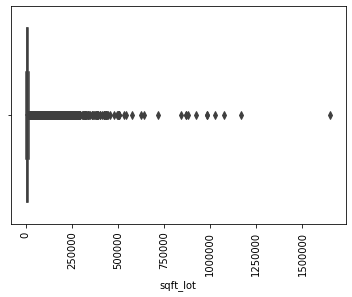

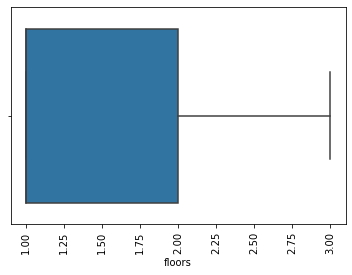

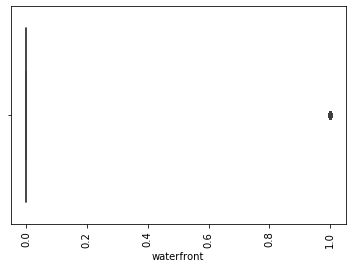

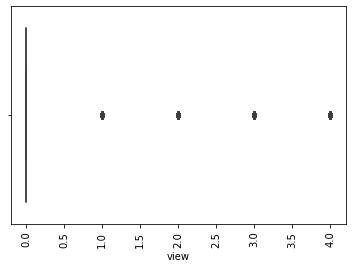

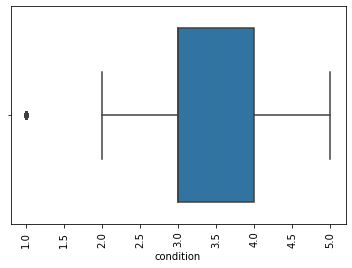

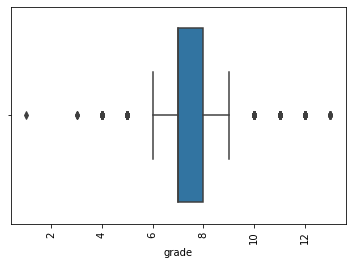

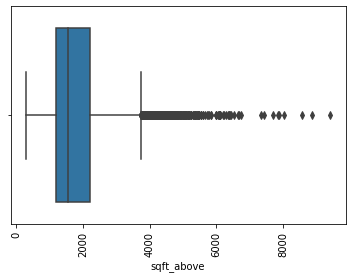

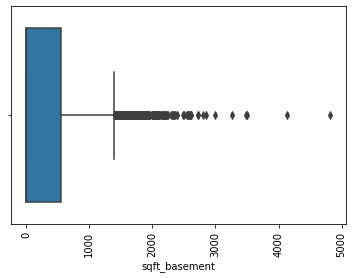

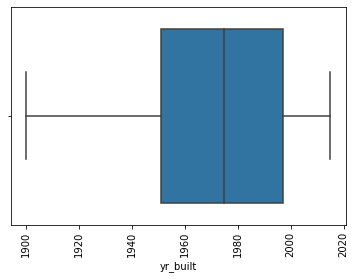

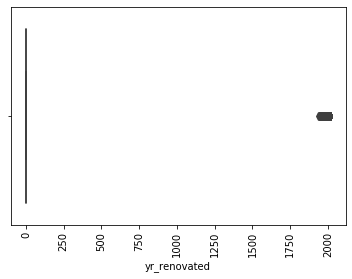

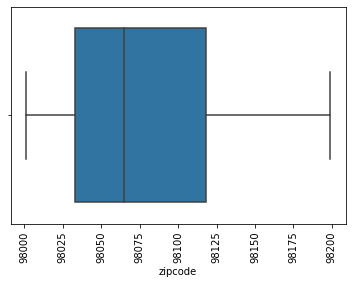

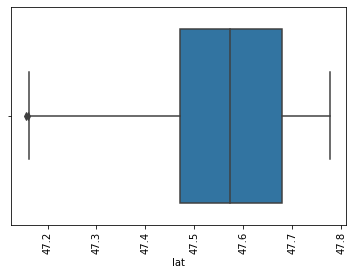

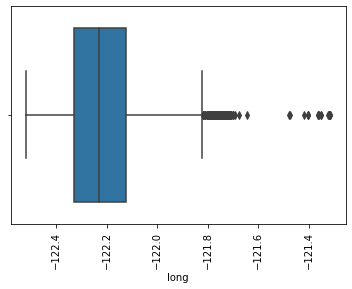

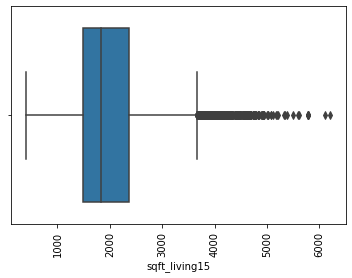

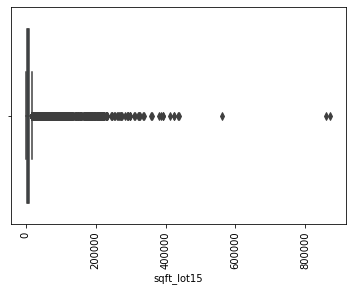

In [39]:
fields = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15','sqft_lot15']

for field in fields:
    house_data_identified_outliers = sns.boxplot(house_data[field])
    plt.xticks(rotation=90)
    plt.show()

> 3.1.2 Plot boxplots for the data after removing outliers

In [40]:
# Update the house data with records that do not have outliers
house_data = house_data[~((house_data < (Q1 - 1.5 * IQR[['price','bedrooms', 'bathrooms','sqft_living', 'sqft_lot','condition','sqft_above', 'sqft_basement', 'sqft_living15','sqft_lot15']])) |(house_data > (Q3 + 1.5 * IQR[['bedrooms', 'bathrooms','sqft_living', 'sqft_lot','condition','sqft_above', 'sqft_basement', 'sqft_living15','sqft_lot15']]))).any(axis=1)]

In [41]:
print('The total number of records remaining after removing outliers is: ' +str(house_data['id'].count()))

The total number of records remaining after removing outliers is: 17625


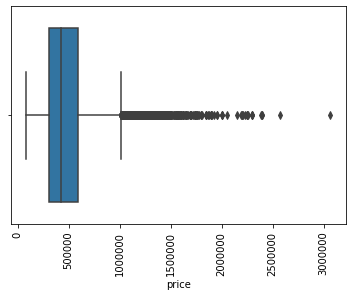

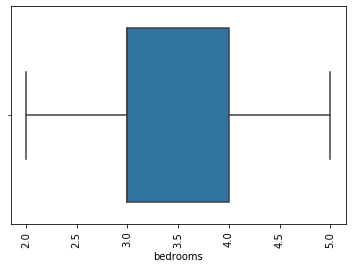

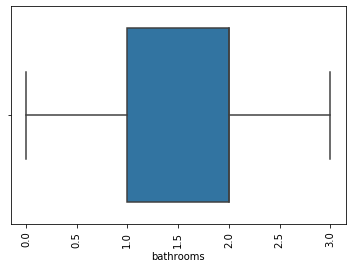

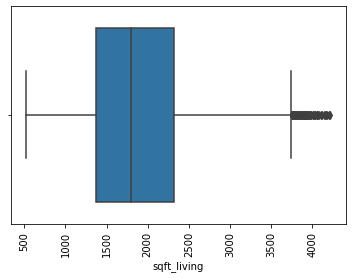

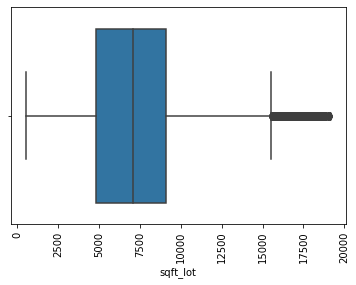

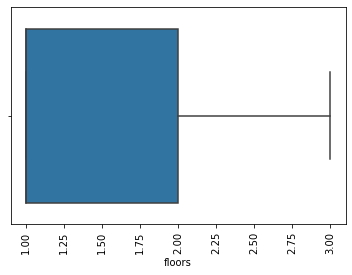

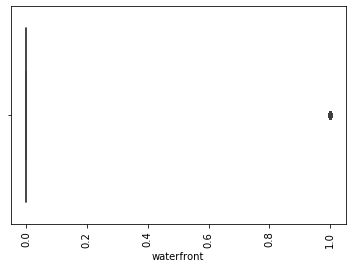

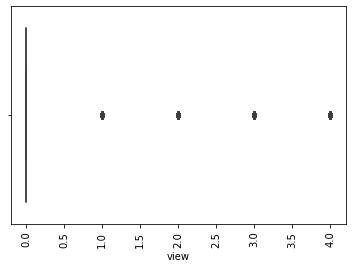

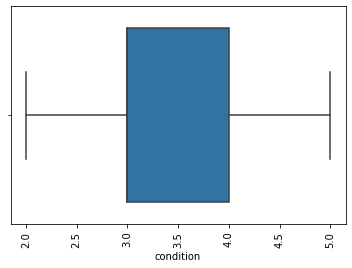

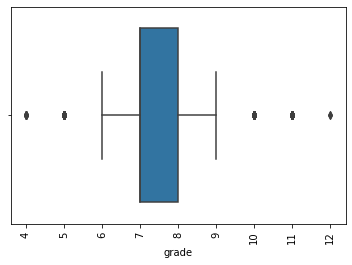

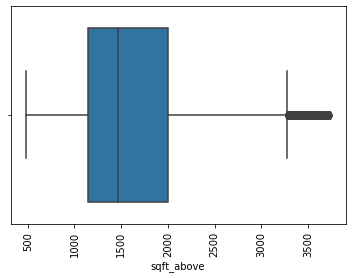

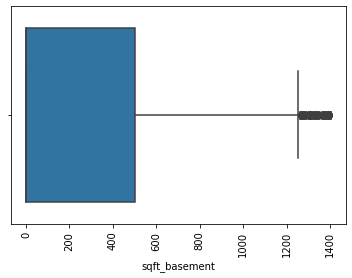

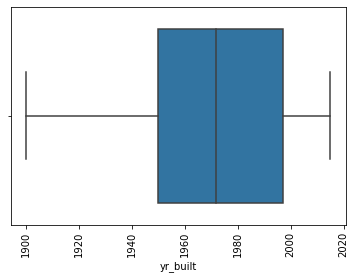

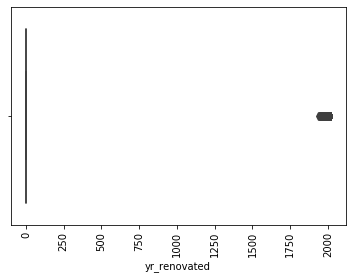

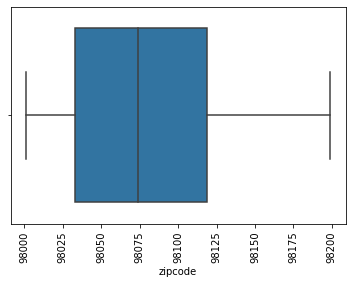

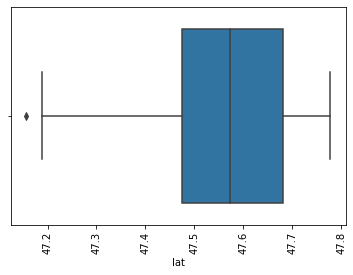

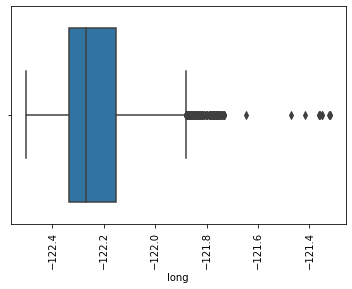

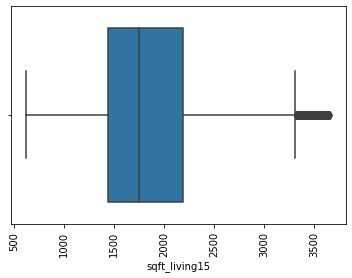

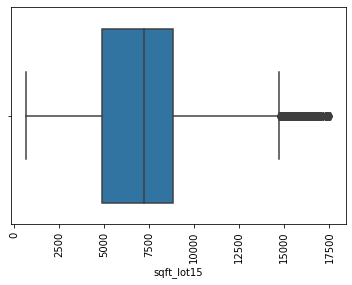

In [42]:
fields = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15','sqft_lot15']

for field in fields:
    house_data_confirm = sns.boxplot(house_data[field])
    plt.xticks(rotation=90)
    plt.show()

### 3.2 Cleaning the dataset

> 3.2.1 Checking for nulls in the datasets

In [43]:
# Identifying the Missing Data
#
house_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

> 3.2.2 Removing unecessary columns from the dataset

In [44]:
house_data.drop(['id'], axis = 1, inplace = True)
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17625 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           17625 non-null  object 
 1   price          17625 non-null  float64
 2   bedrooms       17625 non-null  int32  
 3   bathrooms      17625 non-null  int32  
 4   sqft_living    17625 non-null  int64  
 5   sqft_lot       17625 non-null  int64  
 6   floors         17625 non-null  int32  
 7   waterfront     17625 non-null  int64  
 8   view           17625 non-null  int64  
 9   condition      17625 non-null  int64  
 10  grade          17625 non-null  int64  
 11  sqft_above     17625 non-null  int64  
 12  sqft_basement  17625 non-null  int64  
 13  yr_built       17625 non-null  int64  
 14  yr_renovated   17625 non-null  int64  
 15  zipcode        17625 non-null  int64  
 16  lat            17625 non-null  float64
 17  long           17625 non-null  float64
 18  sqft_l

## 4) Exploratory Data Analysis

### 4.1) Univariate analysis

Text(0.5, 1.0, 'Distribution of prices')

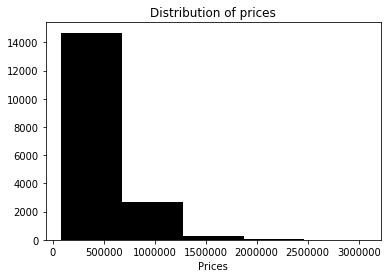

In [45]:
num_bins = 5

plt.hist(house_data['price'], num_bins, histtype="bar", rwidth=2, color='black')

# Labelling our x axis
plt.xlabel("Prices")

# Giving a title to our Bar chart
plt.title("Distribution of prices")

In [46]:
print('Average house prices: ' + str(house_data['price'].mean()))

Average house prices: 481023.91035460995


The highest houses are priced between KES. 1,800,000 and KES. 2,400,000 while the lowest priced are between KES. 100,000 and KES.700,000.

Most of the houses are priced between KES.100,000 and KES.700,000 with an average price of KES. 481,023.

### 4.2) Bivariate Analysis

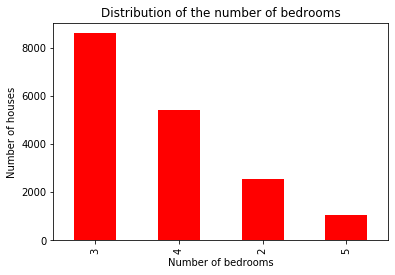

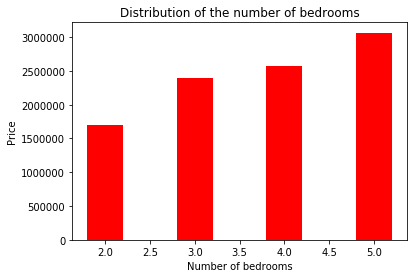

In [47]:
# ***************Visualising the number of bedrooms***************

house_data['bedrooms'].value_counts().plot(kind='bar',color='red')

# Labelling our x axis
plt.xlabel("Number of bedrooms")

# Labelling our y axis
plt.ylabel("Number of houses")

# Giving a title to our Bar chart
plt.title("Distribution of the number of bedrooms")

plt.show()

# ***************Visusliasing the prices for the number of bedrooms***************

plt.bar(house_data['bedrooms'], house_data['price'],color ='red', width = 0.4)

# Labelling our x axis
plt.xlabel("Number of bedrooms")

# Labelling our y axis
plt.ylabel("Price")

# Giving a title to our Bar chart
plt.title("Distribution of the number of bedrooms")

plt.show()

From the assessment above, most houses (approximately 8,700) had three bedrooms while only a few (approximately 700) had 5 bedrooms.

The prices of the houses increase significantly with the increase in the number of bedrooms in the house.

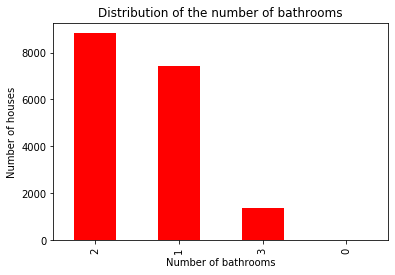

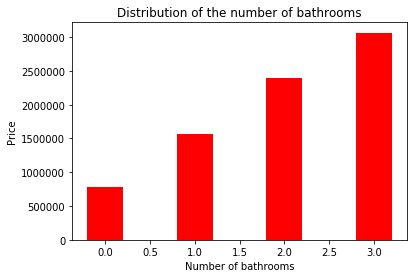

In [48]:
# ***************Visualising the number of bedrooms***************

house_data['bathrooms'].value_counts().plot(kind='bar',color='red')

# Labelling our x axis
plt.xlabel("Number of bathrooms")

# Labelling our y axis
plt.ylabel("Number of houses")

# Giving a title to our Bar chart
plt.title("Distribution of the number of bathrooms")

plt.show()

# ***************Visualising the prices for the number of bedrooms***************

plt.bar(house_data['bathrooms'], house_data['price'],color ='red', width = 0.4)

# Labelling our x axis
plt.xlabel("Number of bathrooms")

# Labelling our y axis
plt.ylabel("Price")

# Giving a title to our Bar chart
plt.title("Distribution of the number of bathrooms")

plt.show()

From the assessment above, most houses (approximately 8,700) had two bathrooms while only a few (approximately 700) had 3 bathrooms.

The prices of the houses increase significantly with the increase in the number of bathrooms in the house.

## 5) Checking for Multicollinearity

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.259247,0.368014,0.588679,-0.011863,0.222641,0.147920,0.315465,0.061029,0.605971,0.474300,0.248243,-0.026851,0.142026,0.023852,0.411251,-0.027361,0.509550,-0.015343
bedrooms,0.259247,1.000000,0.401071,0.605539,0.197949,0.129669,-0.012398,0.042589,0.018669,0.317316,0.488162,0.254870,0.159622,0.017736,-0.168711,-0.059036,0.157695,0.405009,0.185578
bathrooms,0.368014,0.401071,1.000000,0.601214,-0.081060,0.509613,0.013272,0.087060,-0.148387,0.523716,0.543129,0.151774,0.465288,0.054965,-0.153690,-0.009539,0.181221,0.435776,-0.085059
sqft_living,0.588679,0.605539,0.601214,1.000000,0.189364,0.349835,0.037137,0.182255,-0.068627,0.684372,0.842379,0.358149,0.316917,0.053124,-0.185671,0.015235,0.231630,0.733602,0.174493
sqft_lot,-0.011863,0.197949,-0.081060,0.189364,1.000000,-0.330232,0.052198,0.058469,0.124426,0.034649,0.155057,0.075547,-0.059662,-0.008516,-0.253470,-0.144011,0.241046,0.240929,0.876110
floors,0.222641,0.129669,0.509613,0.349835,-0.330232,1.000000,0.020119,0.004453,-0.312847,0.486710,0.532107,-0.286046,0.599560,-0.006457,-0.099614,0.002330,0.163951,0.284984,-0.327885
waterfront,0.147920,-0.012398,0.013272,0.037137,0.052198,0.020119,1.000000,0.302657,0.001327,0.039762,0.025557,0.023221,-0.011965,0.067685,0.033461,-0.003408,-0.003451,0.050405,0.059686
view,0.315465,0.042589,0.087060,0.182255,0.058469,0.004453,0.302657,1.000000,0.029737,0.171682,0.079675,0.193232,-0.084095,0.096533,0.124624,0.029654,-0.098205,0.213437,0.064389
condition,0.061029,0.018669,-0.148387,-0.068627,0.124426,-0.312847,0.001327,0.029737,1.000000,-0.175453,-0.180859,0.188613,-0.382925,-0.061090,0.003081,0.007629,-0.103706,-0.110758,0.128376
grade,0.605971,0.317316,0.523716,0.684372,0.034649,0.486710,0.039762,0.171682,-0.175453,1.000000,0.680603,0.064742,0.452029,0.016198,-0.162167,0.093919,0.170896,0.643492,0.041197


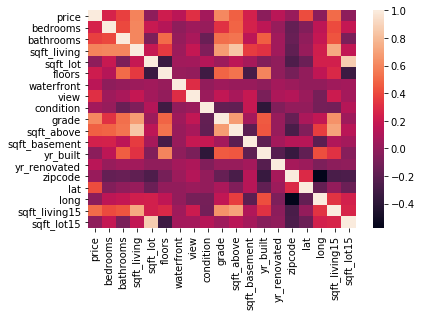

In [49]:
sns.heatmap(house_data.corr())

house_data.corr()

## 6) Implementing the Solution

### 6.1) Multiple Linear Regression

In [50]:
# Separate the dependent variable from the independent variables
X_house_data = house_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y_house_data = house_data['price']

In [51]:
# Encoding the independent variables to convert all categorical (object) values to numerical
encode = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X_house_data = np.array(encode.fit_transform(X_house_data))

In [52]:
# Splitting the dataset into test and train sets
X_train_house_data, X_test_house_data, y_train_house_data, y_test_house_data = train_test_split(X_house_data, y_house_data, test_size = 0.30, random_state = 0)

In [53]:
# Perform feature scaling to ensure that the data is normalised
sc = StandardScaler()
X_train_house_data = sc.fit_transform(X_train_house_data)
X_test_house_data = sc.transform(X_test_house_data)

In [54]:
# Applying a linear regression model on the training dataset
regression_house_data = LinearRegression()
regression_house_data.fit(X_train_house_data,y_train_house_data)
y_pred_house_data = regression_house_data.predict(X_test_house_data)

In [55]:
# Checking the perfromance of the model by observing the metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test_house_data, y_pred_house_data))  

print('Root Mean Squared Error:', r2_score(y_true=y_test_house_data,y_pred=y_pred_house_data))

Mean Squared Error: 18995626172.971355
Root Mean Squared Error: 0.6721325871839392


In [56]:
# Use the linear model to predict the prices of the houses using the training set
actual_vs_predicted = pd.DataFrame({'Actual': np.round(y_test_house_data,2), 'Predicted': np.round(y_pred_house_data,2)})

actual_vs_predicted.describe()

,Actual,Predicted
count,5.288000e+03,5.288000e+03
mean,4.795650e+05,4.791376e+05
std,2.407236e+05,2.057894e+05
min,8.300000e+04,-8.095547e+04
25%,3.100000e+05,3.367085e+05
50%,4.266000e+05,4.643565e+05
75%,5.850000e+05,6.005805e+05
max,2.250000e+06,1.627525e+06


### 6.2) Ridge Regression

In [23]:
# Splitting the dataset into test and train sets
X_train_house_data_ridge, X_test_house_data_ridge, y_train_house_data_ridge, y_test_house_data_ridge = train_test_split(X_house_data, y_house_data, test_size = 0.30, random_state = 0)

In [24]:
# Perform feature scaling to ensure that the data is normalised
sc = StandardScaler()
X_train_house_data_ridge = sc.fit_transform(X_train_house_data_ridge)
X_test_house_data_ridge = sc.transform(X_test_house_data_ridge)

In [25]:
# Applying ridge regression on the training dataset

# Model the data
ridge_house_data = Ridge(normalize=True,alpha=0.01)
ridge_house_data.fit(X_train_house_data_ridge,y_train_house_data_ridge)

# Make a prediction with the ridge regression model on the dataset
y_pred_house_data_ridge = ridge_house_data.predict(X_test_house_data_ridge)

# Checking the metrics for the model
print('Mean Squared Error:', metrics.mean_squared_error(y_test_house_data_ridge, y_pred_house_data_ridge))  

print('Root Mean Squared Error:', r2_score(y_true=y_test_house_data_ridge,y_pred=y_pred_house_data_ridge))

Mean Squared Error: 18953533180.97947
Root Mean Squared Error: 0.6728591186631544


In [26]:
actual_vs_predicted_ridge = pd.DataFrame({'Actual': np.round(y_test_house_data_ridge,2), 'Predicted': np.round(y_pred_house_data_ridge,2)})

actual_vs_predicted_ridge.describe()

,Actual,Predicted
count,5.288000e+03,5.288000e+03
mean,4.795650e+05,4.810189e+05
std,2.407236e+05,2.034639e+05
min,8.300000e+04,-7.966478e+04
25%,3.100000e+05,3.409585e+05
50%,4.266000e+05,4.672954e+05
75%,5.850000e+05,6.014324e+05
max,2.250000e+06,1.621298e+06


### 6.3) Lasso Regression

In [27]:
# Encoding the independent variables to convert all categorical (object) values to numerical
encode = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X_house_data = np.array(encode.fit_transform(X_house_data))

In [28]:
# Splitting the dataset into test and train sets
X_train_house_data_lasso, X_test_house_data_lasso, y_train_house_data_lasso, y_test_house_data_lasso = train_test_split(X_house_data, y_house_data, test_size = 0.30, random_state = 0)

In [29]:
# Perform feature scaling to ensure that the data is normalised
sc = StandardScaler()
X_train_house_data_lasso = sc.fit_transform(X_train_house_data_lasso)
X_test_house_data_lasso = sc.transform(X_test_house_data_lasso)

In [30]:
# Applying lasso regression and a grid search on the training dataset
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
lasso = linear_model.Lasso(tol = 0.0001) 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train_house_data_lasso, y_train_house_data_lasso)

# Checking the metrics for the model
print('Mean Squared Error:', metrics.mean_squared_error(y_test_house_data_lasso, gridlasso.predict(X_test_house_data_lasso)))  

print('Root Mean Squared Error:', r2_score(y_true=y_test_house_data_lasso,y_pred=gridlasso.predict(X_test_house_data_lasso)))

Mean Squared Error: 18956585973.884823
Root Mean Squared Error: 0.6728064269907332


In [31]:
# Show the actual vs the predcted values
actual_vs_predicted_lasso = pd.DataFrame({'Actual': np.round(y_test_house_data_lasso,2), 'Predicted': np.round(gridlasso.predict(X_test_house_data_lasso),2)})

actual_vs_predicted_lasso.describe()

,Actual,Predicted
count,5.288000e+03,5.288000e+03
mean,4.795650e+05,4.810301e+05
std,2.407236e+05,2.047365e+05
min,8.300000e+04,-8.357293e+04
25%,3.100000e+05,3.396516e+05
50%,4.266000e+05,4.671433e+05
75%,5.850000e+05,6.017906e+05
max,2.250000e+06,1.629688e+06


### 6.4) Elastic Net Regression

In [32]:
# Splitting the dataset into test and train sets
X_train_house_data_elastic, X_test_house_data_elastic, y_train_house_data_elastic, y_test_house_data_elastic = train_test_split(X_house_data, y_house_data, test_size = 0.30, random_state = 0)

In [33]:
# Perform feature scaling to ensure that the data is normalised
sc = StandardScaler()
X_train_house_data_elastic = sc.fit_transform(X_train_house_data_elastic)
X_test_house_data_elastic = sc.transform(X_test_house_data_elastic)

In [34]:
# Applying elasctic net regression on the training dataset

# Model the data
elastic_house_data=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic_house_data,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

# We will now fit the model and display the best parameters and the best results for that setup.
search.fit(X_train_house_data_elastic,y_train_house_data_elastic)
best_parameters = search.best_params_
print('Best parameters:' + str(best_parameters))
print('Best score:' + str(abs(search.best_score_)))

Best parameters:{'alpha': 1e-05, 'l1_ratio': 0.8}
Best score:19938413404.724213


In [35]:
# Remodel the data using the new parameters
elastic_house_data=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
elastic_house_data.fit(X_train_house_data_elastic,y_train_house_data_elastic)

ElasticNet(alpha=1e-05, copy_X=True, fit_intercept=True, l1_ratio=0.8,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [36]:
# Make a prediction with the elastic net regression model on the dataset
y_pred_house_data_elastic = elastic_house_data.predict(X_test_house_data_elastic)

# Checking the metrics for the model after adding the new parameters
print('Mean Squared Error:', metrics.mean_squared_error(y_test_house_data_elastic, y_pred_house_data_elastic))  

print('Root Mean Squared Error:', r2_score(y_true=y_test_house_data_elastic,y_pred=y_pred_house_data_elastic))

Mean Squared Error: 18959154188.790886
Root Mean Squared Error: 0.672762099208688


In [37]:
actual_vs_predicted_elastic = pd.DataFrame({'Actual': np.round(y_test_house_data_elastic,2), 'Predicted': np.round(y_pred_house_data_elastic,2)})

actual_vs_predicted_elastic.describe()

,Actual,Predicted
count,5.288000e+03,5.288000e+03
mean,4.795650e+05,4.810017e+05
std,2.407236e+05,2.016508e+05
min,8.300000e+04,-7.405107e+04
25%,3.100000e+05,3.420663e+05
50%,4.266000e+05,4.674278e+05
75%,5.850000e+05,6.000026e+05
max,2.250000e+06,1.608731e+06


### 6.5) Quantile Regression

### 6.5.1) Bedrooms


*************************Outline the parameters for the 0.1th to 0.9th quantiles*************************

    qt      intercept         x_coef  cf_lower_bound  cf_upper_bound
0  0.1  120875.070023   38024.976662    35210.185089    40839.768235
1  0.2  143333.333371   44333.333315    41216.026060    47450.640569
2  0.3  176757.017334   47747.661011    43826.547494    51668.774527
3  0.4  201000.000000   55500.000000    51023.643041    59976.356959
4  0.5  220000.000001   65000.000000    60120.448149    69879.551851
5  0.6  243000.052200   75499.986944    70021.299774    80978.674115
6  0.7  247000.000000   94500.000000    88608.511671   100391.488329
7  0.8  275000.000000  110000.000000   102569.055098   117430.944902
8  0.9  322200.000000  132600.000000   122858.648320   142341.351679

*************************Outline the root mean square for the 0.1th to 0.9th quantiles*************************

Root Mean Squared Error 1: -0.862130389446299
Root Mean Squared Error 2: -0.553528812803

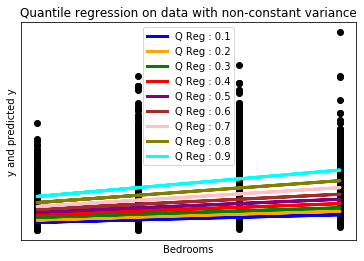

In [114]:
# Finding the regression coefficients for quantiles 
house_data_quantile = pd.DataFrame({'x':house_data['bedrooms'], 'y':house_data['price']})
mod = smf.quantreg('y~x', data = house_data_quantile)

# Define models for several quantiles
quantiles = np.arange(0.1,1,0.1)
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
    res = mod.fit(q = qt )
    models.append(res)
    params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())

print('\n*************************Outline the parameters for the 0.1th to 0.9th quantiles*************************\n')
# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

print('\n*************************Outline the root mean square for the 0.1th to 0.9th quantiles*************************\n')
# Let us now plot 0.1th to 0.9th quantile models against our original data.
y_pred1 = models[0].params['Intercept'] + models[0].params['x'] * house_data['bedrooms']
y_pred2 = models[1].params['Intercept'] + models[1].params['x'] * house_data['bedrooms']
y_pred3 = models[2].params['Intercept'] + models[2].params['x'] * house_data['bedrooms']
y_pred4 = models[3].params['Intercept'] + models[3].params['x'] * house_data['bedrooms']
y_pred5 = models[4].params['Intercept'] + models[4].params['x'] * house_data['bedrooms']
y_pred6 = models[5].params['Intercept'] + models[5].params['x'] * house_data['bedrooms']
y_pred7 = models[6].params['Intercept'] + models[6].params['x'] * house_data['bedrooms']
y_pred8 = models[7].params['Intercept'] + models[7].params['x'] * house_data['bedrooms']
y_pred9 = models[8].params['Intercept'] + models[8].params['x'] * house_data['bedrooms']

print('Root Mean Squared Error 1:', r2_score(y_true=house_data['price'], y_pred=y_pred1))
print('Root Mean Squared Error 2:', r2_score(y_true=house_data['price'], y_pred=y_pred2))
print('Root Mean Squared Error 3:', r2_score(y_true=house_data['price'], y_pred=y_pred3))
print('Root Mean Squared Error 4:', r2_score(y_true=house_data['price'], y_pred=y_pred4))
print('Root Mean Squared Error 5:', r2_score(y_true=house_data['price'], y_pred=y_pred5))
print('Root Mean Squared Error 6:', r2_score(y_true=house_data['price'], y_pred=y_pred6))
print('Root Mean Squared Error 7:', r2_score(y_true=house_data['price'], y_pred=y_pred7))
print('Root Mean Squared Error 8:', r2_score(y_true=house_data['price'], y_pred=y_pred8))
print('Root Mean Squared Error 9:', r2_score(y_true=house_data['price'], y_pred=y_pred9))

## Let us now plot 0.1th, 0.5th and 0.9th quantile models against our original data.
#
print('\n*************************Plot 0.1th to 0.9th quantile models against original data*************************\n')
plt.figure(5)
plt.scatter(house_data['bedrooms'], house_data['price'],  color='black')

plt.plot(house_data['bedrooms'], y_pred1, color='blue',
         linewidth=3, label='Q Reg : 0.1')
plt.plot(house_data['bedrooms'], y_pred2, color='orange',
         linewidth=3, label='Q Reg : 0.2')
plt.plot(house_data['bedrooms'], y_pred3, color='green',
         linewidth=3, label='Q Reg : 0.3')
plt.plot(house_data['bedrooms'], y_pred4, color='red',
         linewidth=3, label='Q Reg : 0.4')
plt.plot(house_data['bedrooms'], y_pred5, color='purple',
         linewidth=3, label='Q Reg : 0.5')
plt.plot(house_data['bedrooms'], y_pred6, color='brown',
         linewidth=3, label='Q Reg : 0.6')
plt.plot(house_data['bedrooms'], y_pred7, color='pink',
         linewidth=3, label='Q Reg : 0.7')
plt.plot(house_data['bedrooms'], y_pred8, color='olive',
         linewidth=3, label='Q Reg : 0.8')
plt.plot(house_data['bedrooms'], y_pred9, color='cyan',
         linewidth=3, label='Q Reg : 0.9')
plt.xticks(())
plt.yticks(())
plt.xlabel("Bedrooms")
plt.ylabel("y and predicted y")
plt.title("Quantile regression on data with non-constant variance")
plt.legend()

# Linear regression is plotted with the blue colored line. 
# We can compare that model with other quantile models.

### 6.5.2) Bathrooms


*************************Outline the parameters for the 0.1th to 0.9th quantiles*************************

    qt      intercept         x_coef  cf_lower_bound  cf_upper_bound
0  0.1  133999.999974   71500.000026    68209.223477    74790.776575
1  0.2  155050.000004   84949.999998    81221.296058    88678.703939
2  0.3  178000.000001   97000.000000    92187.012865   101812.987134
3  0.4  205900.000000  109550.000000   104156.465121   114943.534879
4  0.5  232199.999999  122800.000001   116740.529112   128859.470890
5  0.6  261112.000017  138887.999992   132497.886071   145278.113913
6  0.7  294000.000004  155999.999995   148432.032347   163567.967643
7  0.8  345000.000002  174999.999998   165373.906923   184626.093073
8  0.9  404999.999997  215000.000001   200348.940919   229651.059082

*************************Outline the root mean square for the 0.1th to 0.9th quantiles*************************

Root Mean Squared Error 1: -0.7608552735883536
Root Mean Squared Error 2: -0.45430149499

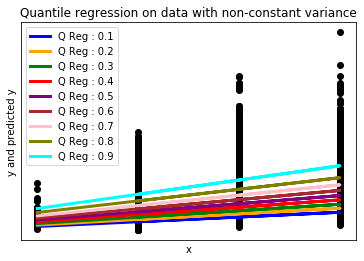

In [120]:
# Finding the regression coefficients for quantiles 
house_data_quantile = pd.DataFrame({'x':house_data['bathrooms'], 'y':house_data['price']})
mod = smf.quantreg('y~x', data = house_data_quantile)

# Define models for several quantiles
quantiles = np.arange(0.1,1,0.1)
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
    res = mod.fit(q = qt )
    models.append(res)
    params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())

print('\n*************************Outline the parameters for the 0.1th to 0.9th quantiles*************************\n')
# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

print('\n*************************Outline the root mean square for the 0.1th to 0.9th quantiles*************************\n')
# Let us now plot 0.1th to 0.9th quantile models against our original data.
y_pred1_bathrooms = models[0].params['Intercept'] + models[0].params['x'] * house_data['bathrooms']
y_pred2_bathrooms = models[1].params['Intercept'] + models[1].params['x'] * house_data['bathrooms']
y_pred3_bathrooms = models[2].params['Intercept'] + models[2].params['x'] * house_data['bathrooms']
y_pred4_bathrooms = models[3].params['Intercept'] + models[3].params['x'] * house_data['bathrooms']
y_pred5_bathrooms = models[4].params['Intercept'] + models[4].params['x'] * house_data['bathrooms']
y_pred6_bathrooms = models[5].params['Intercept'] + models[5].params['x'] * house_data['bathrooms']
y_pred7_bathrooms = models[6].params['Intercept'] + models[6].params['x'] * house_data['bathrooms']
y_pred8_bathrooms = models[7].params['Intercept'] + models[7].params['x'] * house_data['bathrooms']
y_pred9_bathrooms = models[8].params['Intercept'] + models[8].params['x'] * house_data['bathrooms']

print('Root Mean Squared Error 1:', r2_score(y_true=house_data['price'], y_pred=y_pred1_bathrooms))
print('Root Mean Squared Error 2:', r2_score(y_true=house_data['price'], y_pred=y_pred2_bathrooms))
print('Root Mean Squared Error 3:', r2_score(y_true=house_data['price'], y_pred=y_pred3_bathrooms))
print('Root Mean Squared Error 4:', r2_score(y_true=house_data['price'], y_pred=y_pred4_bathrooms))
print('Root Mean Squared Error 5:', r2_score(y_true=house_data['price'], y_pred=y_pred5_bathrooms))
print('Root Mean Squared Error 6:', r2_score(y_true=house_data['price'], y_pred=y_pred6_bathrooms))
print('Root Mean Squared Error 7:', r2_score(y_true=house_data['price'], y_pred=y_pred7_bathrooms))
print('Root Mean Squared Error 8:', r2_score(y_true=house_data['price'], y_pred=y_pred8_bathrooms))
print('Root Mean Squared Error 9:', r2_score(y_true=house_data['price'], y_pred=y_pred9_bathrooms))

## Let us now plot 0.1th, 0.5th and 0.9th quantile models against our original data.
#
print('\n*************************Plot 0.1th to 0.9th quantile models against original data*************************\n')
plt.figure(5)
plt.scatter(house_data['bathrooms'], house_data['price'],  color='black')

plt.plot(house_data['bathrooms'], y_pred1_bathrooms, color='blue',
         linewidth=3, label='Q Reg : 0.1')
plt.plot(house_data['bathrooms'], y_pred2_bathrooms, color='orange',
         linewidth=3, label='Q Reg : 0.2')
plt.plot(house_data['bathrooms'], y_pred3_bathrooms, color='green',
         linewidth=3, label='Q Reg : 0.3')
plt.plot(house_data['bathrooms'], y_pred4_bathrooms, color='red',
         linewidth=3, label='Q Reg : 0.4')
plt.plot(house_data['bathrooms'], y_pred5_bathrooms, color='purple',
         linewidth=3, label='Q Reg : 0.5')
plt.plot(house_data['bathrooms'], y_pred6_bathrooms, color='brown',
         linewidth=3, label='Q Reg : 0.6')
plt.plot(house_data['bathrooms'], y_pred7_bathrooms, color='pink',
         linewidth=3, label='Q Reg : 0.7')
plt.plot(house_data['bathrooms'], y_pred8_bathrooms, color='olive',
         linewidth=3, label='Q Reg : 0.8')
plt.plot(house_data['bathrooms'], y_pred9_bathrooms, color='cyan',
         linewidth=3, label='Q Reg : 0.9')
plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Quantile regression on data with non-constant variance")
plt.legend()

# Linear regression is plotted with the blue colored line. 
# We can compare that model with other quantile models.

### 6.5.3) sqft_living


*************************Outline the parameters for the 0.1th to 0.9th quantiles*************************

    qt      intercept      x_coef  cf_lower_bound  cf_upper_bound
0  0.1   65969.258947  109.914495      107.391948      112.437043
1  0.2   71299.999999  127.647059      124.765724      130.528393
2  0.3   67306.122447  152.993197      148.971332      157.015062
3  0.4   77201.834948  174.311927      169.302817      179.321036
4  0.5   97857.142856  190.476190      185.370743      195.581638
5  0.6  112978.473583  207.436399      202.675616      212.197182
6  0.7  140725.806464  217.741935      212.376282      223.107589
7  0.8  159846.625474  240.490798      234.071018      246.910578
8  0.9  144924.812031  306.766917      296.966846      316.566989

*************************Outline the root mean square for the 0.1th to 0.9th quantiles*************************

Root Mean Squared Error 1: -0.4444341695633405
Root Mean Squared Error 2: -0.17870199701525658
Root Mean Squared Error

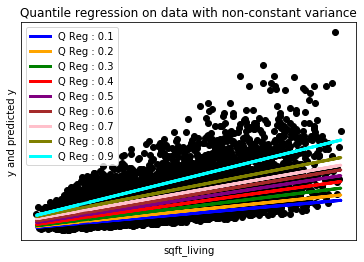

In [121]:
# Finding the regression coefficients for quantiles 
house_data_quantile = pd.DataFrame({'x':house_data['sqft_living'], 'y':house_data['price']})
mod = smf.quantreg('y~x', data = house_data_quantile)

# Define models for several quantiles
quantiles = np.arange(0.1,1,0.1)
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
    res = mod.fit(q = qt )
    models.append(res)
    params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())

print('\n*************************Outline the parameters for the 0.1th to 0.9th quantiles*************************\n')
# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

print('\n*************************Outline the root mean square for the 0.1th to 0.9th quantiles*************************\n')
# Let us now plot 0.1th to 0.9th quantile models against our original data.
y_pred1_sqft_living = models[0].params['Intercept'] + models[0].params['x'] * house_data['sqft_living']
y_pred2_sqft_living = models[1].params['Intercept'] + models[1].params['x'] * house_data['sqft_living']
y_pred3_sqft_living = models[2].params['Intercept'] + models[2].params['x'] * house_data['sqft_living']
y_pred4_sqft_living = models[3].params['Intercept'] + models[3].params['x'] * house_data['sqft_living']
y_pred5_sqft_living = models[4].params['Intercept'] + models[4].params['x'] * house_data['sqft_living']
y_pred6_sqft_living = models[5].params['Intercept'] + models[5].params['x'] * house_data['sqft_living']
y_pred7_sqft_living = models[6].params['Intercept'] + models[6].params['x'] * house_data['sqft_living']
y_pred8_sqft_living = models[7].params['Intercept'] + models[7].params['x'] * house_data['sqft_living']
y_pred9_sqft_living = models[8].params['Intercept'] + models[8].params['x'] * house_data['sqft_living']

print('Root Mean Squared Error 1:', r2_score(y_true=house_data['price'], y_pred=y_pred1_sqft_living))
print('Root Mean Squared Error 2:', r2_score(y_true=house_data['price'], y_pred=y_pred2_sqft_living))
print('Root Mean Squared Error 3:', r2_score(y_true=house_data['price'], y_pred=y_pred3_sqft_living))
print('Root Mean Squared Error 4:', r2_score(y_true=house_data['price'], y_pred=y_pred4_sqft_living))
print('Root Mean Squared Error 5:', r2_score(y_true=house_data['price'], y_pred=y_pred5_sqft_living))
print('Root Mean Squared Error 6:', r2_score(y_true=house_data['price'], y_pred=y_pred6_sqft_living))
print('Root Mean Squared Error 7:', r2_score(y_true=house_data['price'], y_pred=y_pred7_sqft_living))
print('Root Mean Squared Error 8:', r2_score(y_true=house_data['price'], y_pred=y_pred8_sqft_living))
print('Root Mean Squared Error 9:', r2_score(y_true=house_data['price'], y_pred=y_pred9_sqft_living))

## Let us now plot 0.1th, 0.5th and 0.9th quantile models against our original data.
#
print('\n*************************Plot 0.1th to 0.9th quantile models against original data*************************\n')
plt.figure(5)
plt.scatter(house_data['sqft_living'], house_data['price'],  color='black')

plt.plot(house_data['sqft_living'], y_pred1_sqft_living, color='blue',
         linewidth=3, label='Q Reg : 0.1')
plt.plot(house_data['sqft_living'], y_pred2_sqft_living, color='orange',
         linewidth=3, label='Q Reg : 0.2')
plt.plot(house_data['sqft_living'], y_pred3_sqft_living, color='green',
         linewidth=3, label='Q Reg : 0.3')
plt.plot(house_data['sqft_living'], y_pred4_sqft_living, color='red',
         linewidth=3, label='Q Reg : 0.4')
plt.plot(house_data['sqft_living'], y_pred5_sqft_living, color='purple',
         linewidth=3, label='Q Reg : 0.5')
plt.plot(house_data['sqft_living'], y_pred6_sqft_living, color='brown',
         linewidth=3, label='Q Reg : 0.6')
plt.plot(house_data['sqft_living'], y_pred7_sqft_living, color='pink',
         linewidth=3, label='Q Reg : 0.7')
plt.plot(house_data['sqft_living'], y_pred8_sqft_living, color='olive',
         linewidth=3, label='Q Reg : 0.8')
plt.plot(house_data['sqft_living'], y_pred9_sqft_living, color='cyan',
         linewidth=3, label='Q Reg : 0.9')
plt.xticks(())
plt.yticks(())
plt.xlabel("sqft_living")
plt.ylabel("y and predicted y")
plt.title("Quantile regression on data with non-constant variance")
plt.legend()

# Linear regression is plotted with the blue colored line. 
# We can compare that model with other quantile models.

### 6.5.4) floors


*************************Outline the parameters for the 0.1th to 0.9th quantiles*************************

    qt      intercept         x_coef  cf_lower_bound  cf_upper_bound
0  0.1  157500.000001   62500.000000    58545.940927    66454.059073
1  0.2  193400.000010   66549.999995    62234.347593    70865.652397
2  0.3  231749.999998   68250.000002    62701.432623    73798.567382
3  0.4  274062.000003   72645.999999    66251.856550    79040.143448
4  0.5  325999.999998   73000.000001    66016.439954    79983.560047
5  0.6  355000.000019   89999.999991    82717.153091    97282.846890
6  0.7  403000.000003  103999.999999    94889.022312   113110.977686
7  0.8  444999.999999  135000.000000   124745.446389   145254.553612
8  0.9  548999.999998  153000.000002   139959.887962   166040.112042

*************************Outline the root mean square for the 0.1th to 0.9th quantiles*************************

Root Mean Squared Error 1: -0.8564177997513587
Root Mean Squared Error 2: -0.56278789090

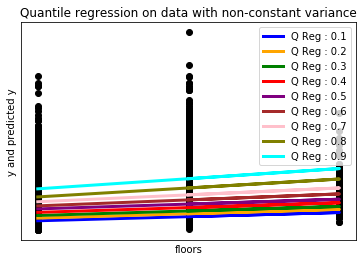

In [122]:
# Finding the regression coefficients for quantiles 
house_data_quantile = pd.DataFrame({'x':house_data['floors'], 'y':house_data['price']})
mod = smf.quantreg('y~x', data = house_data_quantile)

# Define models for several quantiles
quantiles = np.arange(0.1,1,0.1)
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
    res = mod.fit(q = qt )
    models.append(res)
    params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())

print('\n*************************Outline the parameters for the 0.1th to 0.9th quantiles*************************\n')
# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

print('\n*************************Outline the root mean square for the 0.1th to 0.9th quantiles*************************\n')
# Let us now plot 0.1th to 0.9th quantile models against our original data.
y_pred1_floors = models[0].params['Intercept'] + models[0].params['x'] * house_data['floors']
y_pred2_floors = models[1].params['Intercept'] + models[1].params['x'] * house_data['floors']
y_pred3_floors = models[2].params['Intercept'] + models[2].params['x'] * house_data['floors']
y_pred4_floors = models[3].params['Intercept'] + models[3].params['x'] * house_data['floors']
y_pred5_floors = models[4].params['Intercept'] + models[4].params['x'] * house_data['floors']
y_pred6_floors = models[5].params['Intercept'] + models[5].params['x'] * house_data['floors']
y_pred7_floors = models[6].params['Intercept'] + models[6].params['x'] * house_data['floors']
y_pred8_floors = models[7].params['Intercept'] + models[7].params['x'] * house_data['floors']
y_pred9_floors = models[8].params['Intercept'] + models[8].params['x'] * house_data['floors']

print('Root Mean Squared Error 1:', r2_score(y_true=house_data['price'], y_pred=y_pred1_floors))
print('Root Mean Squared Error 2:', r2_score(y_true=house_data['price'], y_pred=y_pred2_floors))
print('Root Mean Squared Error 3:', r2_score(y_true=house_data['price'], y_pred=y_pred3_floors))
print('Root Mean Squared Error 4:', r2_score(y_true=house_data['price'], y_pred=y_pred4_floors))
print('Root Mean Squared Error 5:', r2_score(y_true=house_data['price'], y_pred=y_pred5_floors))
print('Root Mean Squared Error 6:', r2_score(y_true=house_data['price'], y_pred=y_pred6_floors))
print('Root Mean Squared Error 7:', r2_score(y_true=house_data['price'], y_pred=y_pred7_floors))
print('Root Mean Squared Error 8:', r2_score(y_true=house_data['price'], y_pred=y_pred8_floors))
print('Root Mean Squared Error 9:', r2_score(y_true=house_data['price'], y_pred=y_pred9_floors))

## Let us now plot 0.1th, 0.5th and 0.9th quantile models against our original data.
#
print('\n*************************Plot 0.1th to 0.9th quantile models against original data*************************\n')
plt.figure(5)
plt.scatter(house_data['floors'], house_data['price'],  color='black')

plt.plot(house_data['floors'], y_pred1_floors, color='blue',
         linewidth=3, label='Q Reg : 0.1')
plt.plot(house_data['floors'], y_pred2_floors, color='orange',
         linewidth=3, label='Q Reg : 0.2')
plt.plot(house_data['floors'], y_pred3_floors, color='green',
         linewidth=3, label='Q Reg : 0.3')
plt.plot(house_data['floors'], y_pred4_floors, color='red',
         linewidth=3, label='Q Reg : 0.4')
plt.plot(house_data['floors'], y_pred5_floors, color='purple',
         linewidth=3, label='Q Reg : 0.5')
plt.plot(house_data['floors'], y_pred6_floors, color='brown',
         linewidth=3, label='Q Reg : 0.6')
plt.plot(house_data['floors'], y_pred7_floors, color='pink',
         linewidth=3, label='Q Reg : 0.7')
plt.plot(house_data['floors'], y_pred8_floors, color='olive',
         linewidth=3, label='Q Reg : 0.8')
plt.plot(house_data['floors'], y_pred9_floors, color='cyan',
         linewidth=3, label='Q Reg : 0.9')
plt.xticks(())
plt.yticks(())
plt.xlabel("floors")
plt.ylabel("y and predicted y")
plt.title("Quantile regression on data with non-constant variance")
plt.legend()

# Linear regression is plotted with the blue colored line. 
# We can compare that model with other quantile models.


### Conclusion

> The predictions from the Multilinear, Lasso, Elastic net and Ridge regressions are similar. For all the four models, the R squared value was approximately 67.3%.

> Following the quantile regression assessment performed on bedrooms, bathrooms, sq_living and floors, the quantile with the highest R Squared value was the 8th quantile (0.9).

## 8. Challenging the solution

> Additional processes/steps should be performed to test the accuracy of the developed models.

> Additional exploratory analysis can be performed to assess the factors that siginificantly influence the prices of houses.




